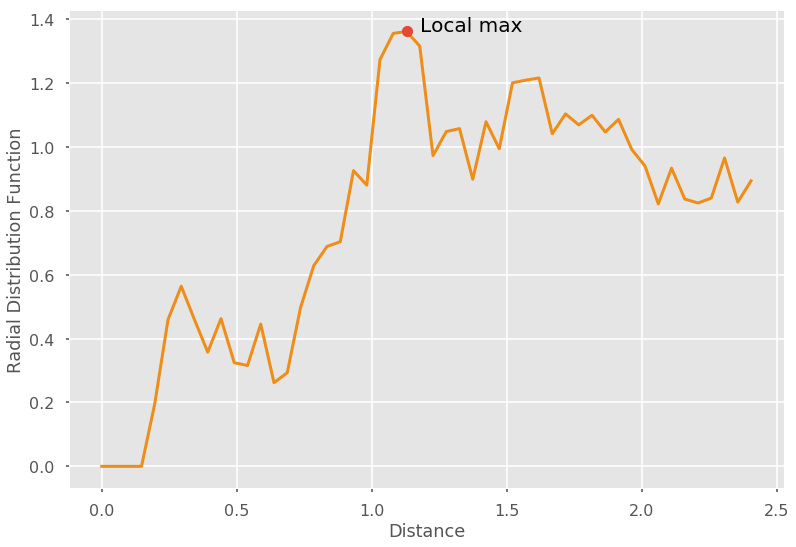

In [97]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as ani

def plot_rdf(r_domain, gr, r_max, gr_max):
    
    fig = plt.figure()
    plt.xlabel("Distance")
    plt.ylabel("Radial Distribution Function")
    plt.style.use('seaborn-poster')
    ax = fig.add_subplot(111)
    line, = ax.plot(r_domain, gr, color='#ee8d18', lw=3)
    ax.plot([r_max], [gr_max], 'o')                                     # <--
    ax.text(r_max + .05, gr_max, 'Local max', fontsize=20)
    plt.show()

plot_rdf(r_domain, current_gr, r_domain[23], current_gr.max())

In [83]:
print(plt.style.available)

['seaborn-poster', 'seaborn-dark', 'bmh', 'seaborn-ticks', 'seaborn-darkgrid', 'seaborn-muted', '_classic_test', 'ggplot', 'grayscale', 'fivethirtyeight', 'seaborn-notebook', 'seaborn-paper', 'seaborn-bright', 'seaborn-deep', 'seaborn-pastel', 'dark_background', 'seaborn-talk', 'seaborn-whitegrid', 'seaborn-white', 'seaborn-dark-palette', 'classic', 'seaborn-colorblind', 'seaborn']


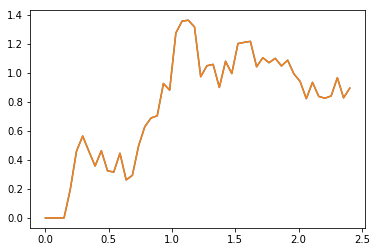

In [51]:
plt.plot(r_domain, current_gr)
plt.show()

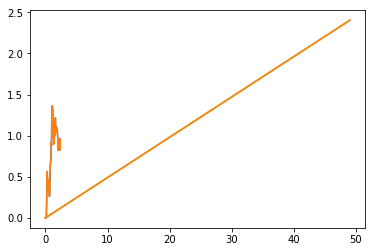

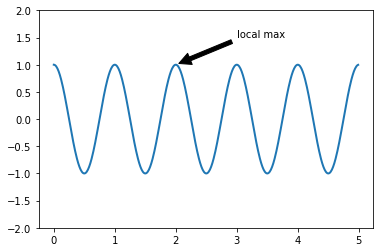

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(-2,2)
plt.show()

In [47]:
gr

array([    0.,     0.,     0.,     0.,     4.,    14.,    24.,    26.,
          26.,    42.,    36.,    42.,    70.,    48.,    62.,   120.,
         172.,   212.,   242.,   354.,   372.,   592.,   690.,   756.,
         794.,   636.,   740.,   804.,   734.,   944.,   930.,  1198.,
        1284.,  1372.,  1246.,  1398.,  1432.,  1554.,  1560.,  1704.,
        1636.,  1628.,  1492.,  1776.,  1666.,  1716.,  1826.,  2190.,
        1956.,  2202.])

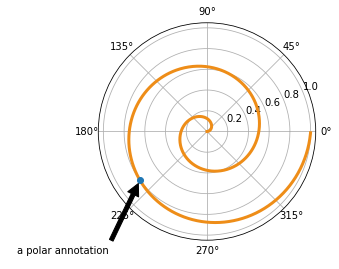

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
coordinates_NIST = np.loadtxt("lj_sample_config_periodic1.txt", skiprows=2, usecols=(1, 2, 3))
bins = 50
num_particles=800
box_length = 10.0
reduced_density = 0.9
def minimum_image_distance(r_i, r_j, box_length):
    rij = r_i - r_j
    rij -= box_length * np.round(rij / box_length)
    rij2 = np.dot(rij, rij)
    return rij2

gr = np.array(bins * [0], dtype = float)
gr_ideal = np.array(bins * [0], dtype = float)
volume = np.power(box_length, 3)
delta_r = (box_length / 2.0) / bins
half_box_length = box_length / 2.0  # half of the box_length is considered for calculation
half_box_length2 = np.power(half_box_length, 2)
r_domain = np.linspace(0.0, half_box_length, bins)
const = 4.0 * reduced_density * np.pi / 3.0
for i_bin in range(0, bins):
    r_lower = i_bin * delta_r
    r_upper = r_lower + delta_r
    n_ideal = const * (np.power(r_upper,3) - np.power(r_lower,3))
    gr_ideal[i_bin] = n_ideal

number_of_snapshots =1
def rdf_func(coordinates_NIST, num_particles, box_length, gr_ideal, delta_r, r_domain):
    for i_mol in range(0, num_particles):
        for j_mol in range(i_mol + 1, num_particles):
            r_i = coordinates_NIST[i_mol]
            r_j = coordinates_NIST[j_mol]
            rij2 = minimum_image_distance(r_i, r_j, box_length)
            half_box_length2 = box_length/2.
            if (rij2 < half_box_length2):
                rij = np.sqrt(rij2)
                bin_number = int(rij / delta_r)
                gr[bin_number] += 2

    current_gr = gr / gr_ideal / number_of_snapshots / num_particles
    gr_max = np.amax(current_gr)
    r_domain_index = np.argmax(current_gr)
    r_domain_max = r_domain[r_domain_index]
    return(r_domain, current_gr, gr_max, r_domain_max)

FileNotFoundError: [Errno 2] No such file or directory: 'lj_sample_config_periodic1.txt'

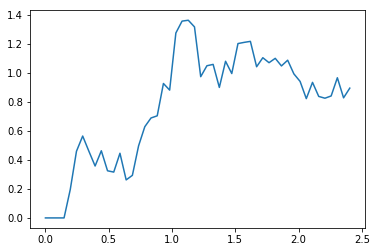